<a href="https://colab.research.google.com/github/MussaddikKhan/Data-Science-College-Practicals-/blob/main/Experiment_No_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment – 6**  
**Date:**  
**Roll No.: 24201013**  
**Title:** *Random Forest Classifier Algorithm*

---

## **Theory**

Random Forest is a powerful **supervised machine learning algorithm** used for both **classification** and **regression** tasks.  
It follows an **ensemble learning** approach, meaning it combines multiple decision trees to produce more accurate and stable results.

A Random Forest builds several decision trees, each trained on a **random subset** of the dataset and a **random subset of features**. During prediction:

- Each tree gives its own output  
- The final prediction is made using:  
  - **Majority Voting** → Classification  
  - **Averaging** → Regression  

Because it uses multiple trees instead of just one, Random Forest:

- Reduces overfitting  
- Increases accuracy  
- Improves stability  

---

## **Working Steps of Random Forest**

### **Step 1 — Bootstrapping (Sampling with Replacement)**  
Random subsets of the dataset are created.

### **Step 2 — Build Decision Trees**  
Each subset is used to train an individual decision tree.

### **Step 3 — Random Feature Selection**  
At every node split, only a **random subset of features** is considered.

### **Step 4 — Aggregate Predictions**  
- For **classification** → Majority vote  
- For **regression** → Average output  

---

## **Advantages**
- Higher accuracy compared to a single Decision Tree  
- Reduces overfitting  
- Works well on large datasets  
- Handles missing data effectively  

## **Disadvantages**
- Slower during prediction  
- Complex compared to a single tree  
- Harder to interpret the model  

---

## **Applications**
- Fraud detection  
- Medical diagnosis  
- Recommendation systems  
- Weather prediction  

---



Out-of-Bag Error Estimate: 0.2143
Training Accuracy: 100.00%
Prediction for new data: No


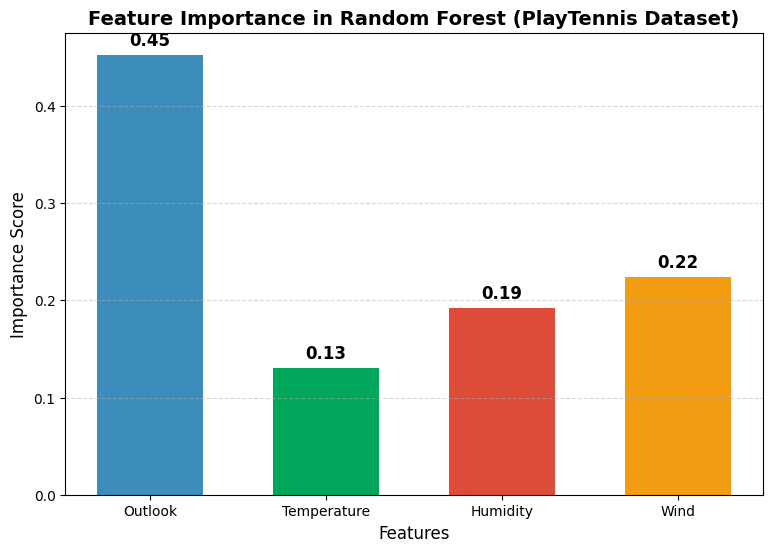

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ---------------------------------------
# Step 1: Define the Dataset (PlayTennis)
# ---------------------------------------
data = np.array([
    [1, 1, 1, 1],
    [1, 1, 1, 2],
    [2, 1, 1, 1],
    [3, 2, 1, 1],
    [3, 3, 2, 1],
    [3, 3, 2, 2],
    [2, 3, 2, 2],
    [1, 2, 1, 1],
    [1, 3, 2, 1],
    [3, 2, 2, 1],
    [1, 2, 2, 2],
    [2, 2, 1, 2],
    [2, 1, 2, 1],
    [3, 2, 1, 2]
])

# PlayTennis Target: 1 = Yes, 0 = No
target = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

# ---------------------------------------
# Step 2: Train Random Forest
# ---------------------------------------
random_forest = RandomForestClassifier(
    n_estimators=120,
    random_state=42,
    oob_score=True
)

random_forest.fit(data, target)

# ---------------------------------------
# Step 3: Out-of-Bag Error
# ---------------------------------------
oob_error = 1 - random_forest.oob_score_
print(f"Out-of-Bag Error Estimate: {oob_error:.4f}")

# ---------------------------------------
# Step 4: Accuracy on Training Data
# ---------------------------------------
predicted = random_forest.predict(data)
accuracy = accuracy_score(target, predicted) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# ---------------------------------------
# Step 5: Predict New Sample
# Example: Sunny, Cool, High, Strong -> [1, 3, 1, 2]
# ---------------------------------------
new_sample = np.array([[1, 3, 1, 2]])
prediction = random_forest.predict(new_sample)[0]

print("Prediction for new data:", "Yes" if prediction == 1 else "No")

# ---------------------------------------
# Step 6:  Plot
# ---------------------------------------
features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
importances = random_forest.feature_importances_

plt.figure(figsize=(9, 6))
bars = plt.bar(features, importances, color=['#3c8dbc', '#00a65a', '#dd4b39', '#f39c12'], width=0.6)

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', fontsize=12, fontweight='bold')

plt.title("Feature Importance in Random Forest (PlayTennis Dataset)", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
